In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm

import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict


# Import required packages
import numpy as np
import pandas as pd
#import plotly_express as px


from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr
from astropy import constants
from astropy import units as u
from astropy import units

from datetime import datetime, date, time, timezone
from datetime import datetime
from datetime import timedelta
from astropy.time import Time
from astropy.io import ascii




%matplotlib inline
%config InlineBackend.figure_format='svg'


import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [9]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)         

In [1]:
from specutils import Spectrum1D
import astropy.units as u
import numpy as np
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth



In [3]:
spec1 = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm,
                   flux=np.random.default_rng(12345).random(49)*u.Jy)
spec1_bsmooth = box_smooth(spec1, width=3)
spec1_gsmooth = gaussian_smooth(spec1, stddev=3)
spec1_tsmooth = trapezoid_smooth(spec1, width=3)



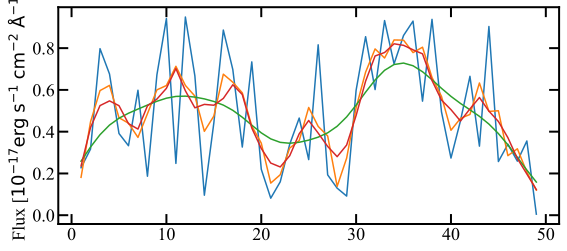

In [19]:
fig = plt.figure(figsize=(9,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax1 = fig.add_subplot(211)

ax1.plot(spec1.spectral_axis,spec1.flux,zorder=1)   
ax1.plot(spec1_bsmooth.spectral_axis,spec1_bsmooth.flux,zorder=2)   
ax1.plot(spec1_gsmooth.spectral_axis,spec1_gsmooth.flux,zorder=3)   
ax1.plot(spec1_tsmooth.spectral_axis,spec1_tsmooth.flux,zorder=4)   



#ax1.set_ylabel(r'$F_{\lambda}$')
#ax1.axvspan(5700/(1+z_i), 5900/(1+z_i), facecolor='grey', alpha=0.5,zorder=2)
ax1.set_ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
set_ax_tick(ax1)
#ax1.set_title('RA %.5f  DEC %.5f z=%.4f mjd=%d'%(ra,dec,z_i,mjd_i))



In [4]:
gaussian_smooth(spec1, stddev=3) 

<Spectrum1D(flux=<Quantity [0.25860917, 0.32640733, 0.38562205, 0.43159269, 0.46445898,
           0.48828727, 0.50822537, 0.52741247, 0.54565787, 0.56035736,
           0.56880835, 0.57015658, 0.56561802, 0.55700108, 0.54472603,
           0.52720679, 0.50217622, 0.46914624, 0.43114785, 0.39432907,
           0.36548049, 0.34885759, 0.34456742, 0.34936895, 0.35949514,
           0.37376516, 0.39451092, 0.42591854, 0.47068509, 0.5272207 ,
           0.58920337, 0.64763434, 0.69379067, 0.72157276, 0.7284874 ,
           0.71560131, 0.68696137, 0.64870578, 0.60757162, 0.56898454,
           0.53520565, 0.5047466 , 0.47338241, 0.43641424, 0.39090495,
           0.3368543 , 0.27706956, 0.21605198, 0.15868783] Jy>, spectral_axis=<SpectralAxis [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
   15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
   29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
   43., 44., 45., 46., 47., 48., 49

In [12]:
from astropy.convolution import Box1DKernel
from specutils.manipulation import convolution_smooth

box1d_kernel = Box1DKernel(width=3)

spec1 = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm,
                   flux=np.random.default_rng(12345).random(49) * u.Jy)


In [14]:
spec1_con=convolution_smooth(spec1, box1d_kernel)

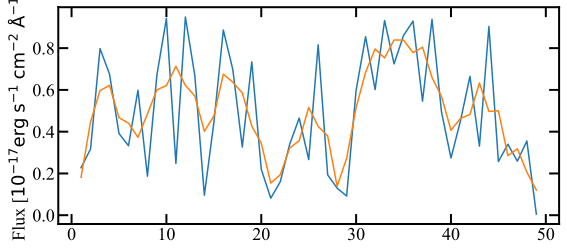

In [15]:
fig = plt.figure(figsize=(9,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax1 = fig.add_subplot(211)

ax1.plot(spec1.spectral_axis,spec1.flux,zorder=1)   

ax1.plot(spec1_con.spectral_axis,spec1_con.flux,zorder=2)   


#ax1.set_ylabel(r'$F_{\lambda}$')
#ax1.axvspan(5700/(1+z_i), 5900/(1+z_i), facecolor='grey', alpha=0.5,zorder=2)
ax1.set_ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
set_ax_tick(ax1)
#ax1.set_title('RA %.5f  DEC %.5f z=%.4f mjd=%d'%(ra,dec,z_i,mjd_i))



In [17]:
from specutils.manipulation import median_smooth

spec1 = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm,
                   flux=np.random.default_rng(12345).random(49) * u.Jy)
spec1_median=median_smooth(spec1, width=3) 

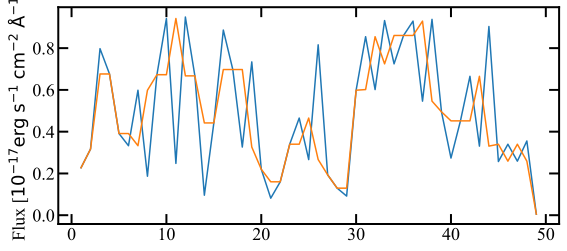

In [18]:
fig = plt.figure(figsize=(9,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax1 = fig.add_subplot(211)

ax1.plot(spec1.spectral_axis,spec1.flux,zorder=1)   

ax1.plot(spec1_median.spectral_axis,spec1_median.flux,zorder=2)   


#ax1.set_ylabel(r'$F_{\lambda}$')
#ax1.axvspan(5700/(1+z_i), 5900/(1+z_i), facecolor='grey', alpha=0.5,zorder=2)
ax1.set_ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
set_ax_tick(ax1)
#ax1.set_title('RA %.5f  DEC %.5f z=%.4f mjd=%d'%(ra,dec,z_i,mjd_i))



In [20]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fbc88458340>

In [21]:
filename = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits'
# The spectrum is in the second HDU of this file.
with fits.open(filename) as f:  
    specdata = f[1].data[1020:1250]  

In [22]:
from specutils import Spectrum1D
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
input_spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

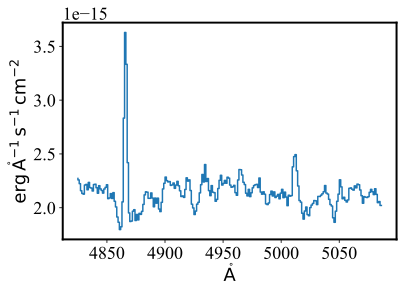

In [23]:
f, ax = plt.subplots()  
ax.step(input_spec.spectral_axis, input_spec.flux) 

In [24]:
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
new_disp_grid = np.arange(4800, 5200, 3) * u.AA

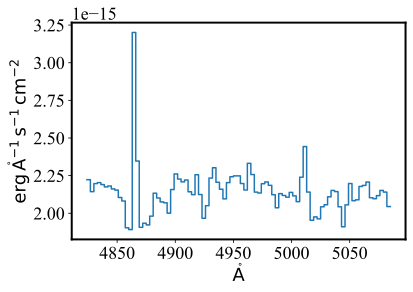

In [25]:
fluxcon = FluxConservingResampler()
new_spec_fluxcon = fluxcon(input_spec, new_disp_grid) 
f, ax = plt.subplots()  
ax.step(new_spec_fluxcon.spectral_axis, new_spec_fluxcon.flux) 


In [27]:
input_spec.spectral_axis

<SpectralAxis [4825.0303, 4826.14  , 4827.2534, 4828.364 , 4829.477 , 4830.5884,
   4831.699 , 4832.8135, 4833.9253, 4835.04  , 4836.1523, 4837.2676,
   4838.3804, 4839.4937, 4840.6094, 4841.723 , 4842.8394, 4843.9536,
   4845.071 , 4846.185 , 4847.3003, 4848.418 , 4849.533 , 4850.6514,
   4851.7676, 4852.886 , 4854.0024, 4855.119 , 4856.239 , 4857.356 ,
   4858.476 , 4859.5938, 4860.7144, 4861.8325, 4862.951 , 4864.0723,
   4865.1914, 4866.3135, 4867.4326, 4868.555 , 4869.6753, 4870.7954,
   4871.919 , 4873.0396, 4874.163 , 4875.2847, 4876.4087, 4877.531 ,
   4878.653 , 4879.778 , 4880.9004, 4882.026 , 4883.149 , 4884.275 ,
   4885.3984, 4886.5225, 4887.6494, 4888.7734, 4889.901 , 4891.026 ,
   4892.154 , 4893.2793, 4894.405 , 4895.5337, 4896.6597, 4897.789 ,
   4898.9155, 4900.0454, 4901.1724, 4902.3   , 4903.4307, 4904.5586,
   4905.6895, 4906.818 , 4907.9497, 4909.0786, 4910.208 , 4911.3403,
   4912.47  , 4913.603 , 4914.7334, 4915.8667, 4916.9976, 4918.1313,
   4919.2627, 4920.394

In [26]:
new_spec_fluxcon.spectral_axis

<SpectralAxis [4800., 4803., 4806., 4809., 4812., 4815., 4818., 4821., 4824., 4827.,
   4830., 4833., 4836., 4839., 4842., 4845., 4848., 4851., 4854., 4857.,
   4860., 4863., 4866., 4869., 4872., 4875., 4878., 4881., 4884., 4887.,
   4890., 4893., 4896., 4899., 4902., 4905., 4908., 4911., 4914., 4917.,
   4920., 4923., 4926., 4929., 4932., 4935., 4938., 4941., 4944., 4947.,
   4950., 4953., 4956., 4959., 4962., 4965., 4968., 4971., 4974., 4977.,
   4980., 4983., 4986., 4989., 4992., 4995., 4998., 5001., 5004., 5007.,
   5010., 5013., 5016., 5019., 5022., 5025., 5028., 5031., 5034., 5037.,
   5040., 5043., 5046., 5049., 5052., 5055., 5058., 5061., 5064., 5067.,
   5070., 5073., 5076., 5079., 5082., 5085., 5088., 5091., 5094., 5097.,
   5100., 5103., 5106., 5109., 5112., 5115., 5118., 5121., 5124., 5127.,
   5130., 5133., 5136., 5139., 5142., 5145., 5148., 5151., 5154., 5157.,
   5160., 5163., 5166., 5169., 5172., 5175., 5178., 5181., 5184., 5187.,
   5190., 5193., 5196., 5199.] Angstrom